<a href="https://colab.research.google.com/github/mylesm9/jupyter_notebooks/blob/main/Stocks_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Description: This program uses the three movong average crossover stratergy to determione when to buy and sell stock*

#Load Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# Load the Data 

In [46]:
from google.colab import files
uploaded  = files.upload()

In [47]:
# Store the data as a variable 
df = pd.read_csv ('TSLA.csv')

#Set the index
df = df.set_index (pd.DatetimeIndex(df['Date'].values))
df

df

,Date,Open,High,Low,Close,Adj Close,Volume
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


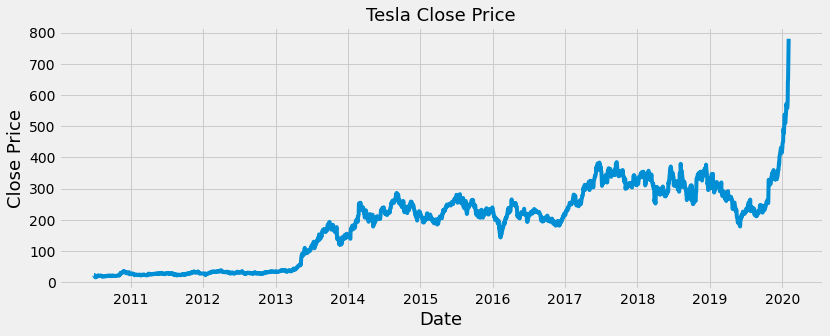

In [48]:
# Visualise the Data
plt.figure(figsize=(12.2, 4.5)) 
plt.title ('Tesla Close Price', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel ('Close Price', fontsize = 18)
plt.show()

In [49]:
# Calculate the three moving averages 
# Calculate the short / fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust = False).mean()
#Calculate the long / slow exponential moving average(EMA)
LongEMA = df.Close.ewm(span=63, adjust=False).mean()
# Calculate the middle or mediuam exponential moving average 
MiddleEMA =df.Close.ewm(span=21, adjust=False).mean()

In [50]:
# Visulise the close price and the EMA Average

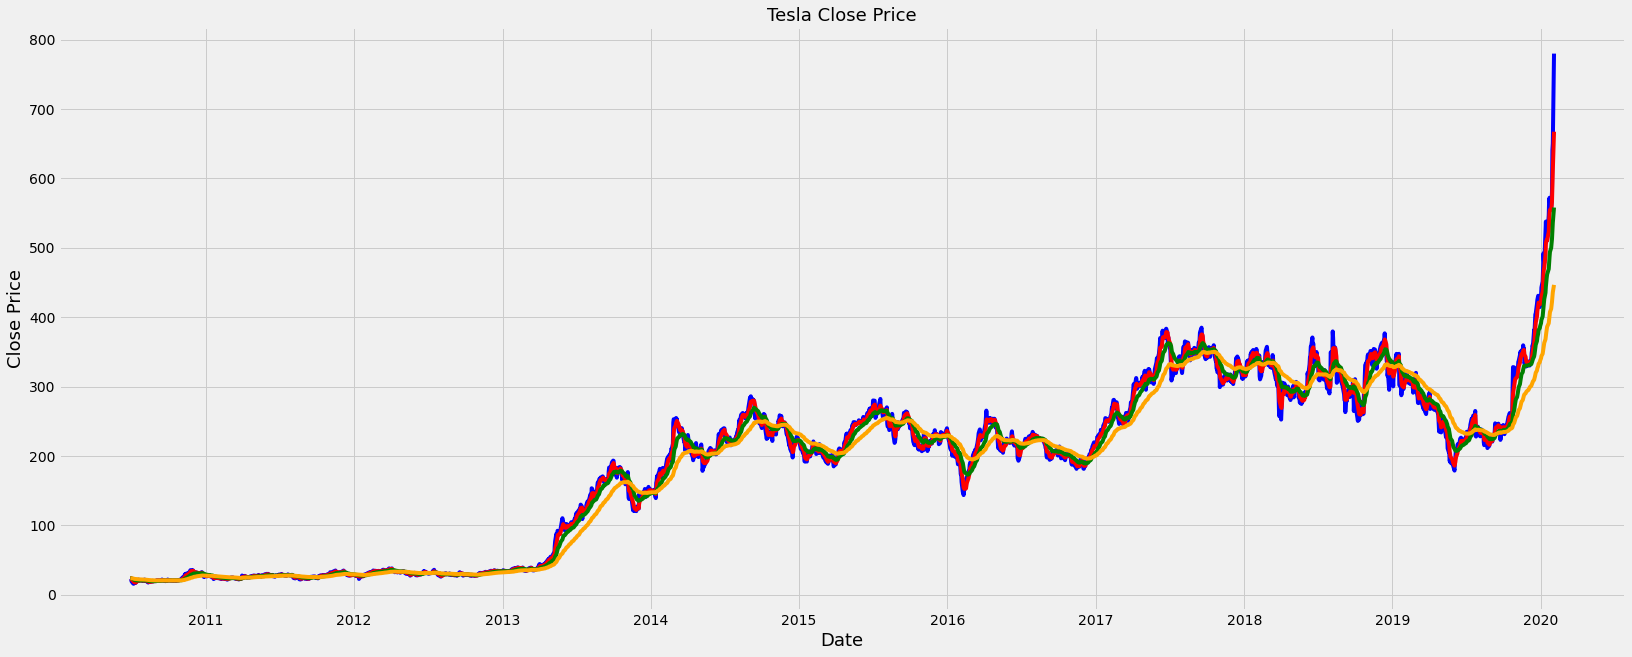

In [51]:
# Visualise the closing price and EMA Averages 
plt.figure(figsize=(25
                    , 10)) 
plt.title ('Tesla Close Price', fontsize = 18)
plt.plot(df['Close'], label= 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short/Fast EMA', color= 'red')
plt.plot(MiddleEMA, label='Middle/Medoum EMA', color= 'green')
plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'orange')
plt.xlabel('Date', fontsize = 18)
plt.ylabel ('Close Price', fontsize = 18)
plt.show()

In [52]:
# Add the EMA to the data set
df['Short']= ShortEMA
df['Middle']= MiddleEMA
df['Long']= LongEMA

In [53]:
# Show the df
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,23.889999,23.889999,23.889999
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,23.869999,23.884545,23.888124
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,23.233333,23.709586,23.827870
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,21.888889,23.299624,23.683249
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,19.962593,22.646022,23.446585
...,...,...,...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,559.537387,506.095322,417.004092
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,566.688255,512.903928,422.128651
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,591.395503,524.531753,428.962443
2020-01-31,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,611.120337,535.989776,435.887680


In [56]:
# Funtion the buy and sell the stock (Stratergy)
def buy_sell_function(data):

  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range (0,len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False: 
        buy_list.append (data['Close'] [i])
        sell_list.append(np.nan)
        flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
        sell_list.append(data['Close'][i])
        buy_list.append(np.nan)
        flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
        buy_list.append (data['Close'] [i])
        sell_list.append(np.nan)
        flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
        sell_list.append(data['Close'][i])
        buy_list.append(np.nan)
        flag_long = False
    else:
        buy_list.append(np.nan)
        sell_list.append(np.nan)
  return (buy_list, sell_list)



In [55]:
# Add the buy and sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

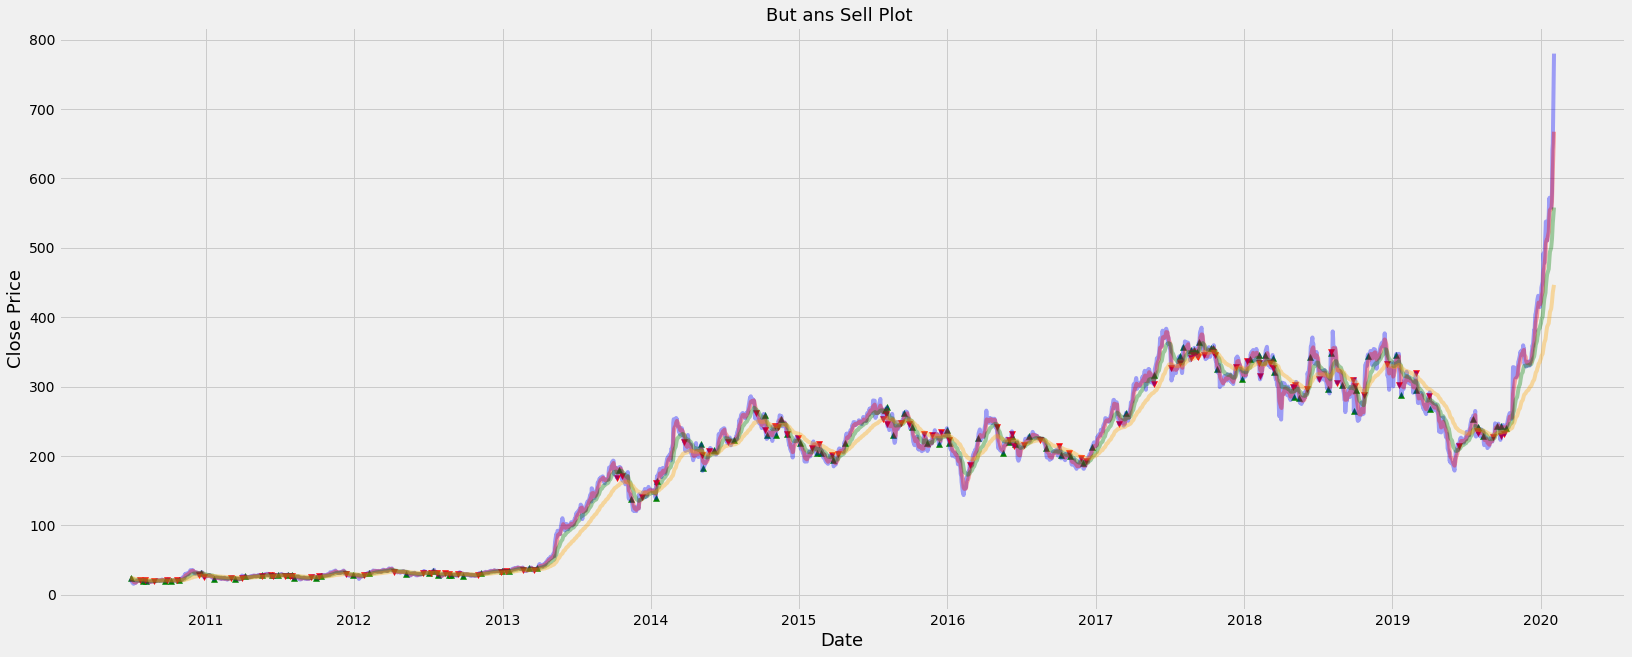

In [57]:
# Visually show the stck sell and buy signals
plt.figure(figsize=(25, 10)) 
plt.title ('But ans Sell Plot ', fontsize = 18)
plt.plot(df['Close'], label= 'Close Price', color = 'blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'Short/Fast EMA', color= 'red',alpha = 0.35)
plt.plot(MiddleEMA, label='Middle/Medoum EMA', color= 'green',alpha = 0.35)
plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'orange',alpha = 0.35)
plt.scatter (df.index, df['Buy'], color = 'green', marker='^', alpha=1)
plt.scatter (df.index, df['Sell'], color = 'red', marker='v', alpha=1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel ('Close Price', fontsize = 18)
plt.show()